# Calcolo dell'energia libera di Gibbs del piropo, in funzione della temperatura e alla pressione di 1 bar

Il programma è una modifica di quello che abbiamo già visto per il calcolo dell'entropia della stessa sostanza. Qui viene aggiunta una funzione per il calcolo dell'entalpia che sfrutta ancora i dati sul calore specifico, ricordando che, a pressione costante, $dH=C_P\,dT$ e $dS=C_P/T\,dT$. 

Come dato aggiuntivo abbiamo anche bisogno dell'entalpia di formazione del piropo dagli elementi, in condizioni standard ($H_0$).

Tutti i dati preventivi necessari sono conservati nella variabile *reg* che è un'istanza della classe *fpar*:

```
class fpar():
    def __init__(self):
        self.flag=False       
        self.ex=(0,1,-1,2, -2,0.5,-0.5)
        self.size=len(self.ex)
        self.par=np.ones(self.size)
        self.h0=-6281969.575
        self.s0=269.5
        self.g0=self.h0-298.15*self.s0
        self.minT=10.
    def set(self,par):
        self.par=par
    def set_h0(self,h):
        self.h0=h
    def set_s0(self,s):
        self.s0=s
    def set_g0(self):
        self.g0=self.h0-298.15*self.s0
    def out(self):
        print("Entalpia di formazione %12.2f J/mole" % self.h0)
        print("Entropia di stato standard %9.2f J/mole K" % self.s0)
        print("Energia libera di Gibbs di stato standard %9.2f J/mole" %\
               self.g0)
        print("\nCoefficienti del polinomio che esprime Cp in funzione")
        print("di T, determinati per 'best fit' dai dati sperimentali")
        index=0
        for ip in self.par:
            print("parameter %i, value: %6.4e" % (index, self.par[index]))
            index=index+1
```

La variabile reg viene creata con

```
reg=fpar()
```

Una volta creata, *reg* contiene 
<ul>
    <li>l'entalpia di formazione (reg.h0)</li> 
    <li>un valore di entropia di *letteratura* (reg.s0)</li>
    <li>un valore di energia libera di formazione in condizioni standard (reg.g0=reg.h0-298.15*reg.s0)</li>
    <li>una lista di parametri (inizializzati a 1) dei coefficienti che esprimono $C_P$ in funzione di <i>T</i> (parametri che             verranno successivamente ottimizzati, per best fit, dalla funzione <i>fit</i>)</li>  
    <li>una lista di esponenti delle potenze di <i>T</i> che esprimono la funzione $C_P$: 
        <code>reg.ex=(0,1,-1,2, -2,0.5,-0.5)</code> che produrrà la funzione<br><br>
        $$C_P=aT^0 + bT +cT^{-1} + dT^2 + eT^{-2} + fT^{0.5}+gT^{-0.5}$$
        <br>
        e i coefficienti a, b, c... sono quelli conservati nella lista reg.par
</ul>

La classe fpar (e quindi la sua istanza reg) comprende anche delle funzioni che consento di operare sui valori della variabili che conserva; per esempio 

```
def set(self,par):
        self.par=par
```

quando invocata con

```
reg.set(opt)
```

salva la lista *opt* nella variabile *reg.par*

Queste funzioni definite nella classe *fpar* vengono chiamate *metodi* della classe. *reg.set* è dunque un metodo della classe *reg*, istanza della classe *fpar*.

Ci si prenda il tempo necessario per studiarsi la classe *fpar*. Per approfondire l'argomento esiste moltissimo materiale in rete, anche in italiano. Per esempio, trovate [qui](https://docs.python.it/html/tut/node11.html) un testo esplicativo sula sintassi e sul funzionamento delle classi. Qualche nota di approfondimento è anche scritta qui, al termine di questo notebook.

Lanciamo adesso il <i>magic command</i> ```%matplotlib inline``` per avere la grafica inline in questo notebook e 
```%run gibbs.py``` per lanciare il programma

In [1]:
%matplotlib inline

In [1]:
%run gibbs.py

Visualizziamo i dati salvati in reg, con il metodo <code>out</code> di *reg*

In [2]:
reg.out()

Entalpia di formazione  -6281969.58 J/mole
Entropia di stato standard    269.50 J/mole K
Energia libera di Gibbs di stato standard -6362321.00 J/mole

Coefficienti del polinomio che esprime Cp in funzione
di T, determinati per 'best fit' dai dati sperimentali
parameter 0, value: 1.0000e+00
parameter 1, value: 1.0000e+00
parameter 2, value: 1.0000e+00
parameter 3, value: 1.0000e+00
parameter 4, value: 1.0000e+00
parameter 5, value: 1.0000e+00
parameter 6, value: 1.0000e+00


Le variabili conservate in *reg* possono anche essere visualizzate (usate e anche assegnate) direttamente, semplicemente *invocandole*; per esempio *reg.ex* sono gli esponenti della serie di potenze di *T* con cui si esprime *Cp(T)*:

In [4]:
reg.ex

(0, 1, -1, 2, -2, 0.5, -0.5)

Per ottenere l'energia libera di Gibbs alla temperature *T* si può partire chiamando direttamente la funzione <code>gibbs</code>, specificando la temperatura e il parametro <code>prt=True</code> (default <code>prt=True</code>)

```
def gibbs(T,prt=False):
    if not reg.flag:
        print("Eseguo preventivamente la funzione start")
        start()
    enth_T=entalpia(T)+reg.h0                   # Calcolo di H(T)
    ent_T=entropia(T)                           # Calcolo di S(T)
    gibbs_T=enth_T-T*ent_T                      # Calcolo di G(T)=H(T)-T*S(T)
    DG=gibbs_T-reg.g0                           # Calcolo di Delta_G = G(T) - G0
    if prt:
        print("Delta G(T): %8.2f J/mole; T: %5.1f K" % (DG,T))
        return
    return DG                                   # restituzione di Delta_G
```

Poichè la funzione è chiamata senza aver preventivamente chiamato la funzione <code>start</code>, che esegue il fit del $C_P(T)$ e calcola l'entropia di stato standard, <code>gibbs</code> chiama preventivamente <code>start</code>. Le successive chiamate di <code>gibbs</code> non necessitano più della chiamata <code>start</code>. Questo meccanismo è realizzato dalle tre righe di codice

```
    if not reg.flag:
        print("Eseguo preventivamente la funzione start")
        start()
```

La variabile <code>reg.flag</code> è inizializzata a <code>False</code> all'inizio del programma; <code>not reg.flag</code> è dunque <code>True</code> e il codice scritto entro la condizione <code>if</code> è eseguito: viene chiamata la funzione <code>start</code> che, tra le altre cose, cambia il valore di <code>reg.flag</code> a <code>True</code>, in modo che la volta successiva l'espressione 

```not reg.flag=False``` 

sia <code>False</code> e il codice della condizione <code>if</code> non più eseguito.  

La funzione *start* è:

```
def start():
    reg.flag=True                       # switch di reg.flag a True
    T=500                               # T max per il plot di Cp(T)
    fit(prt=False)                      # best fit della funzione Cp sui dati sperimentali di Cp 
    check_cp()                          # plot di Cp(T)
    plot_entropy(T)                     # calcolo dell'entropia e plot di S(T)
    ent_st=entropia(298.15)             # entropia nello stato standard S0
    reg.set_s0(ent_st)                  # assegnazione di S0 a alla variabile reg.s0, attraverso il metodo reg.set_s0
    reg.set_g0()                        # assegnazione di G0 a reg.g0
    print("\nEntropia di stato standard: %6.2f J/mole K" % ent_st)
    print("Energia libera di stato standard: %9.2f J/mole" % reg.g0)
```

Eseguo preventivamente la funzione start


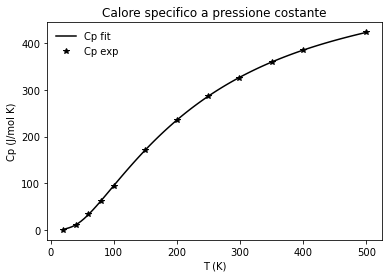


      T   Cp_exp   Cp_fit  delta
  20.00    0.862    0.855  0.007
  40.00   11.054   11.192 -0.138
  60.00   33.631   33.173  0.458
  80.00   62.668   62.806 -0.138
 100.00   94.270   94.818 -0.548
 150.00  171.540  171.264  0.276
 200.00  235.850  235.308  0.542
 250.00  286.480  286.608 -0.128
 298.15  325.310  325.887 -0.577
 350.00  359.030  359.382 -0.352
 400.00  385.800  385.022  0.778
 500.00  422.800  422.980 -0.180


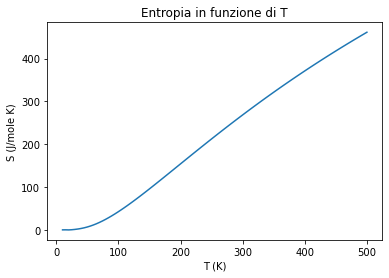


Entropia di stato standard: 266.35 J/mole K
Energia libera di stato standard: -6361381.52 J/mole
Delta G(T): -74287.61 J/mole; T: 500.0 K


In [5]:
gibbs(500,prt=True)

<code>start</code> esegue il fit di $C_P$, calcola l'entropia di stato standard $S_0$ e l'energia libera nello stato standard $G_0$, a partire dall'entalpia di *formazione* allo stato standard $H_0$ (contenuta nella variabile <code>reg.h0</code>): 
$$G_0=H_0 - T_0\,S_0$$

dove $T_0=298.15$. Attraverso i due integrali

$$\int_{H_0}^{H} dH = \int_{T_0}^{T} C_PdT \rightarrow H(T)=H_0 + \int_{T_0}^{T} C_PdT$$

e

$$\int_{0}^{S} dS = \int_{0}^{T} \frac{C_P}{T}dT \rightarrow S(T)=\int_{0}^{T} \frac{C_P}{T}dT$$

<br><br>
viene quindi calcolata $G(T)=H(T)-TS(T)$ e restituito il valore $\Delta G=G(T)-G_0$

Poichè, a questo punto, la funzione *fit* è stata eseguita, se invochiamo il metodo *reg.out* visualizziamo le nuove variabili *reg.par* aggiornate (anche s0 e g0 sono aggiornate):

In [6]:
reg.out()

Entalpia di formazione  -6281969.58 J/mole
Entropia di stato standard    266.35 J/mole K
Energia libera di Gibbs di stato standard -6361381.52 J/mole

Coefficienti del polinomio che esprime Cp in funzione
di T, determinati per 'best fit' dai dati sperimentali
parameter 0, value: -2.8925e+03
parameter 1, value: -5.5659e+00
parameter 2, value: -3.3466e+04
parameter 3, value: 1.3063e-03
parameter 4, value: 6.4400e+04
parameter 5, value: 2.2991e+02
parameter 6, value: 1.5600e+04


La successiva chiamata di *gibbs* non esegue più alcun fit (perchè adesso ```reg.flag=True```):

In [7]:
print(reg.flag)

True


In [8]:
gibbs(600,prt=True)

Delta G(T): -124481.00 J/mole; T: 600.0 K


Il plot della funzione $\Delta G = G(T)-G_0$ in funzione di $T$ viene quindi effettuato chiamando la funzione *gibbs_plot* che ha codice:

```
def gibbs_plot(T):
    if T < 298.15:
        print("La temperatura deve essere superiore a 298.15 K")
        return
    T_list=np.linspace(298.15, T, 50)             # T_list è una lista di 50 valori di temperatura da 50 a T K
    gibbs_list=np.array([])                       # lista (array) gibbs_list inizialiazzata (vuota)
    
    for it in T_list:                             # ciclo su tutti i valori in T_list
        ig=gibbs(it)                              # calcolo energia G alla temperatura "it"
        gibbs_list=np.append(gibbs_list,ig)       # i valori di energia libera (ig) vengono salvati in gibbs_list
        
    plt.figure()                                  # sezione grafica
    plt.plot(T_list,gibbs_list)
    plt.xlabel("T (K)")
    plt.ylabel("Delta G (J/mole)")
    plt.title("Delta G = G(T) - G(298.15)")
    plt.show()
```
<br><br>
Poniamo la T massima per cui fare il plot a 600 K:

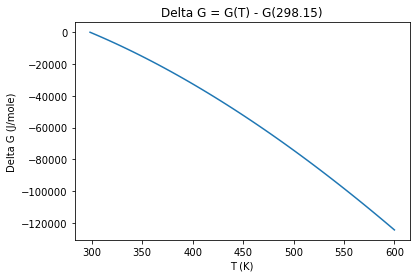

In [9]:
gibbs_plot(600)

## Nota sulle variabili in python e sull'uso delle classi 
### (per chi voglia approfondire e imparare a programmare in python)

<br><br>
Nella scrittura di un programma python occorre fare attenzione all'assegnazione e all'uso che si fa delle variabili. Ogni variabile è definita in un certo contesto e può essere *vista* o *non vista* in altri contesti (funzioni) dello stesso programma. 

Come regola generale, una variabile definita e assegnata nel corpo principale del programma viene passata a tutte le funzioni definite nello stesso programma. Si veda in proposito il piccolo programma che segue    

In [10]:
a=10
print("Stampa iniziale di 'a': %i" % a)

def fun():
    print("Stampa di 'a' all'interno della funzione: %i" % a)

# chiamata alla funzione fun che stampa "a" a cui la funzione medesima può accedere
fun()

Stampa iniziale di 'a': 10
Stampa di 'a' all'interno della funzione: 10


Modifichiamo adesso il programma in modo che venga definita, assegnata e usata una variabile *b* all'interno della funzione *fun*

In [11]:
a=10
print("Stampa iniziale di a: %i" % a)

def fun():
    b=5
    print("Stampa di 'a' all'interno della funzione: %i" % a)
    c=a+b
    print("Stampa di 'b' e 'c=a+b': %i, %i" % (b, c))

# chiamata alla funzione fun che stampa "a" a cui la funzione medesima può accedere
fun()


Stampa iniziale di a: 10
Stampa di 'a' all'interno della funzione: 10
Stampa di 'b' e 'c=a+b': 5, 15


Tuttavia, se proviamo a fare stampare la variabile *b*, con un <code>print(b)</code> al di fuori della funzione *fun* (e dopo che *fun* sia stata chiamata) otteniamo un errore: ```name 'b' is not defined```

In [12]:
a=10
print("Stampa iniziale di 'a': %i" % a)

def fun():
    b=5
    print("Stampa di 'a' all'interno della funzione: %i" % a)
    c=a+b
    print("Stampa di 'b' e 'c=a+b': %i, %i" % (b, c))

# chiamata alla funzione fun che stampa "a" a cui la funzione medesima può accedere
fun()
print(b)

Stampa iniziale di 'a': 10
Stampa di 'a' all'interno della funzione: 10
Stampa di 'b' e 'c=a+b': 5, 15


NameError: name 'b' is not defined

Questo perchè *b* è definita <em>localmente</em> all'interno della funzione *fun* e non è accessibile al di fuori di quella funzione.

Interessante il comportamento che vediamo nel programmino seguente:

In [13]:
a=10
print("Stampa iniziale di 'a': %i" % a)

def fun():
    a=5
    print("Stampa di 'a' all'interno della funzione: %i" % a)
    
# chiamata alla funzione fun che stampa "a" a cui la funzione medesima può accedere
fun()
print("Nuova stampa di 'a' al di fuori della funzione: %i" % a)

Stampa iniziale di 'a': 10
Stampa di 'a' all'interno della funzione: 5
Nuova stampa di 'a' al di fuori della funzione: 10


Qui la variabile *a* è riassegnata nella funzione *fun* e stampata (valore 5); ma quando si esce da *fun*, e si richiede nuovamente il valore di *a*, si riottiene il valore originale (10). Questo perchè la variabile *a* definita nel programma principale (l'ambiente) non è la stessa variabile locale *a* definita all'interno di *fun* seppur abbia lo stesso nome; *a* globale e *a* locale sono in effetti due variabili distinte.  

Se vogliamo modificare la variabile *a* in *fun* e conservarla anche al di fuori della funzione, dobbiamo definirla come <code>global</code> all'interno della funzione:

In [14]:
a=10
print("Stampa iniziale di 'a': %i" % a)

def fun():
    global a, b
    a=5
    b=20
    print("Stampa di 'a' all'interno della funzione: %i" % a)
    
# chiamata alla funzione fun che stampa "a" a cui la funzione medesima può accedere
fun()
print("Nuova stampa di 'a' al di fuori della funzione: %i" % a)
print("Stampa di 'b' al di fuori della funzione: %i" % b)

Stampa iniziale di 'a': 10
Stampa di 'a' all'interno della funzione: 5
Nuova stampa di 'a' al di fuori della funzione: 5
Stampa di 'b' al di fuori della funzione: 20


Come vediamo, l'ultima stampa di *a* dopo l'esecuzione di *fun* ci dice che effettivamente la variabile è stata modificata. Non solo, ma definendo come global anche *b*, all'interno della funzione, il suo valore viene conservato e reso disponibile all'esterno della funzione medesima.

Questo comportamento delle variabile va sotto il nome di *scoping*: lo *scope* di una variabile è l'ambiente entro il quale risulta definita: le variabili definite nell'ambiente principale hanno scoping globale, mentre quelle nelle funzioni hanno scoping locale e, in generale, non hanno nessuna connessione con quelle globali dell'ambiente esterno, anche se hanno (apparentemente) lo stesso nome. All'interno di una funzione, una variabile locale può essere resa globale usando esplicitamente la direttiva <code>global</code>

Ora, tutti gli sviluppatori del linguaggio Python *sconsigliano* assolutamente di scrivere codice in cui ci siano funzioni che modifichino i valori di variabili globali! Questo perchè, in programmi lunghi, si perde molto rapidamente traccia di *chi modifica cosa*, diventa facile fare errori (*bug*) ed è difficile scovarli tutte le volte che questi programmi mostrano problemi. In un programma scritto *bene* non *dovrebbero* esserci direttive <code>global</code> all'interno delle funzioni.
C'è anzi il rischio che ciò che sia oggi solo sconsigliato (*deprecated* nel gergo informatico) diventi *vietato* in successive release del sistema, per cui codice scritto oggi con pratiche *deprecated*, in futuro potrebbe non funzionare più negli ambienti *upgraded*. 

La soluzione esiste e sta nella definizione delle *classi*. Si esamini il codice seguente (e i commenti al suo interno):

In [15]:
class var():
    def __init__(self,vv):         # Inizializzazione della variabile 'a'
        self.a=vv
    def set_a(self,vv):            # metodo per modificare la variabile
        self.a=vv
    def print(self):               # metodo per stampare la variabile
        print("La variabile vale %i" % self.a)
        
v=var(10)                          # vengono create due istanze della classe var
w=var(5)

print("Stampe iniziali delle variabili 'v.a' e 'w.a':")
v.print()                          # Viene usato il metodo print delle due istanze v e w per
w.print()                          # stampare le variabili corrispondenti v.a e w.a
                                   # Si noti che, non solo v.a e w.a sono variabili diverse,
                                   # ma diversi sono anche i metodi v.print e w.print
        
def fun():                         # semplice funzione che modifica v.a attraverso il metodo v.set_a
    v.set_a(20)
    print("\nStampa della variabile 'v.a' all'interno della funzione")
    v.print()

fun()                              # chiamata della funzione fun

print("\nStampa di 'v.a' all'esterno della funzione (che l'ha modificata)")
v.print()

Stampe iniziali delle variabili 'v.a' e 'w.a':
La variabile vale 10
La variabile vale 5

Stampa della variabile 'v.a' all'interno della funzione
La variabile vale 20

Stampa di 'v.a' all'esterno della funzione (che l'ha modificata)
La variabile vale 20


Come si vede, la funzione *fun*, usando il metodo *v.set_a*, è stata in grado di modificare *globalmente* il valore della variabile *v.a*, senza usare alcuna direttiva <code>global</code>.

Da notare che le variabili delle classi si possono modificare direttamente senza passare dai metodi (come *set_a*), come fatto nel programmino che segue (che è una modifica del precedente) in cui *fun*, che accetta adesso anche un argomento *vv*, modifica direttamente *v.a* con un'assegnazione diretta <code>v.a=vv</code>.

In [16]:
class var():
    def __init__(self,vv):         # Inizializzazione della variabile 'a'
        self.a=vv
    def set_a(self,vv):            # metodo per modificare la variabile
        self.a=vv
    def print(self):               # metodo per stampare la variabile
        print("La variabile vale %i" % self.a)
        
v=var(10)                          # vengono create due istanze della classe var
w=var(5)

print("Stampe iniziali delle variabili 'v.a' e 'w.a':")
v.print()                          # Viene usato il metodo print delle due istanze v e w per
w.print()                          # stampare le variabili corrispondenti v.a e w.a
                                   # Si noti che, non solo v.a e w.a sono variabili diverse,
                                   # ma diversi sono anche i metodi v.print e w.print
        
def fun(vv):                       # semplice funzione che modifica v.a attraverso il metodo v.set_a
    v.a=vv
    print("\nStampa della variabile 'v.a' all'interno della funzione")
    v.print()

fun(20)                            # chiamata della funzione fun con argomento vv=20

print("\nStampa di 'v.a' all'esterno della funzione (che l'ha modificata)")
v.print()

Stampe iniziali delle variabili 'v.a' e 'w.a':
La variabile vale 10
La variabile vale 5

Stampa della variabile 'v.a' all'interno della funzione
La variabile vale 20

Stampa di 'v.a' all'esterno della funzione (che l'ha modificata)
La variabile vale 20


Questa pratica, per quanto sia possibile, viene pure *sconsigliata* (ma non come nel caso dell'uso di global), *caldeggiando* invece la definizione e l'uso di metodi appositi definiti all'interno della classe (*set_a*). Questa, in effetti, è la filosofia delle tecniche di programmazione ad oggetti in cui le classi vengono costruite per conservare dati e funzioni che possono accedere a quei dati: quelle stesse funzioni fanno da *interfaccia* per tutte le altre funzioni del programma che devono accedere a quegli stessi dati. In alcuni linguaggi come il C++, non è possibile accedere alle variabili delle classi senza passare dai metodi che fanno da interfaccia.